## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data



In [5]:
train = pd.read_csv('/kaggle/input/titanic-traincsv/titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory Data Analysis


## Missing Data


In [6]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<Axes: >

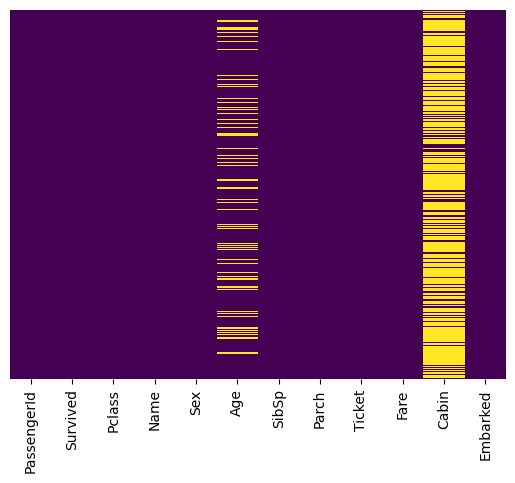

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

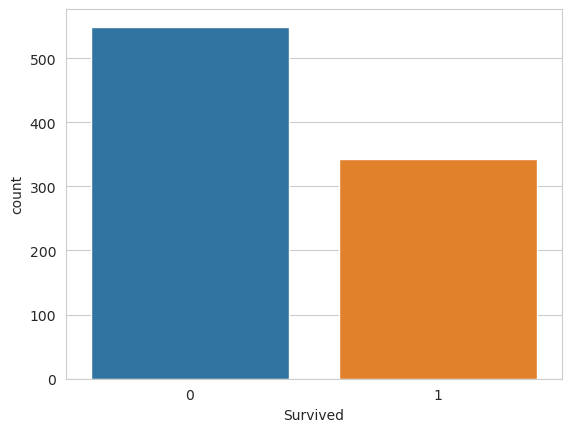

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

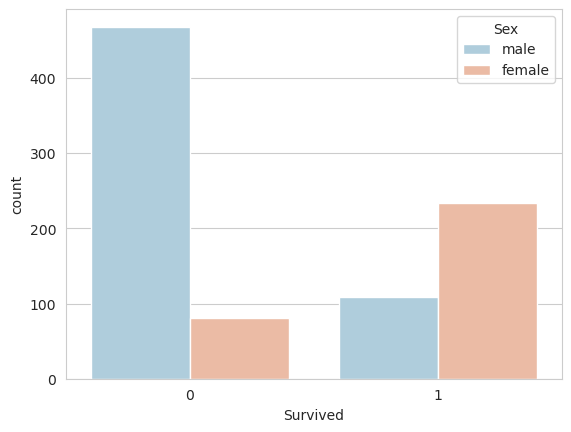

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

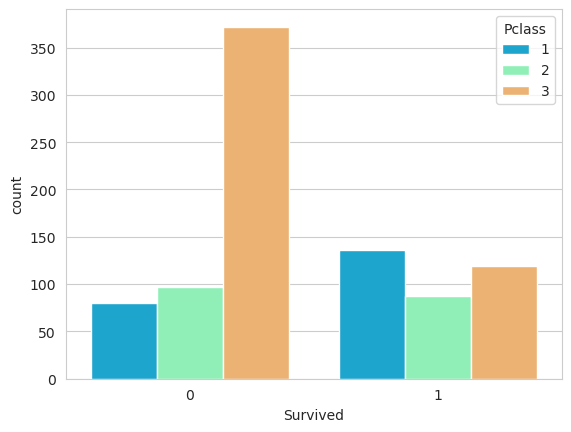

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

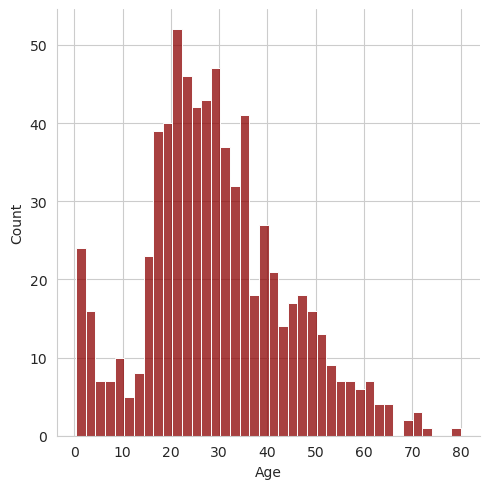

In [13]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

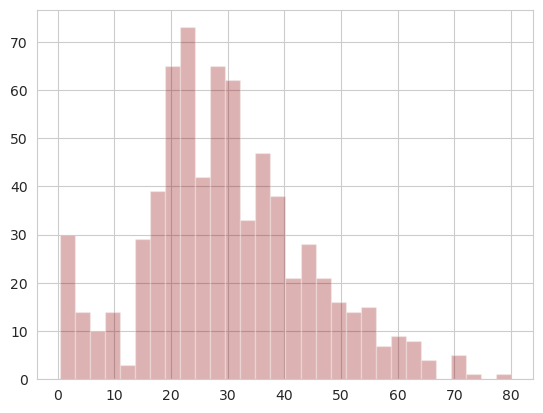

In [14]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

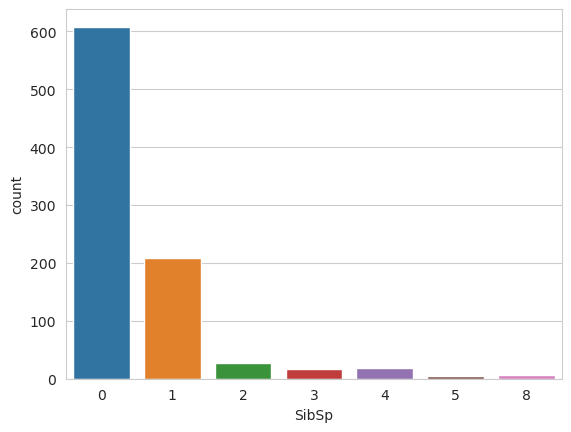

In [15]:
sns.countplot(x='SibSp',data=train)

<Axes: >

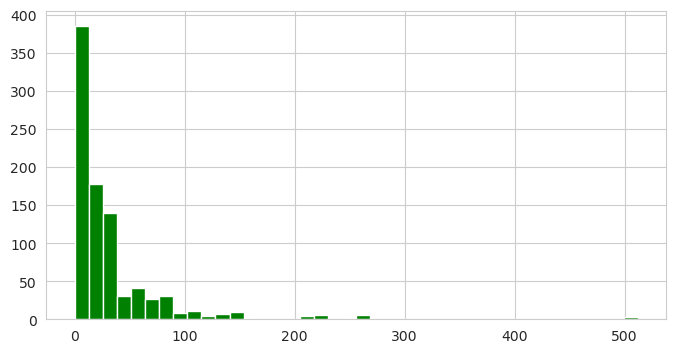

In [16]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 

In [18]:
import cufflinks as cf
cf.go_offline()

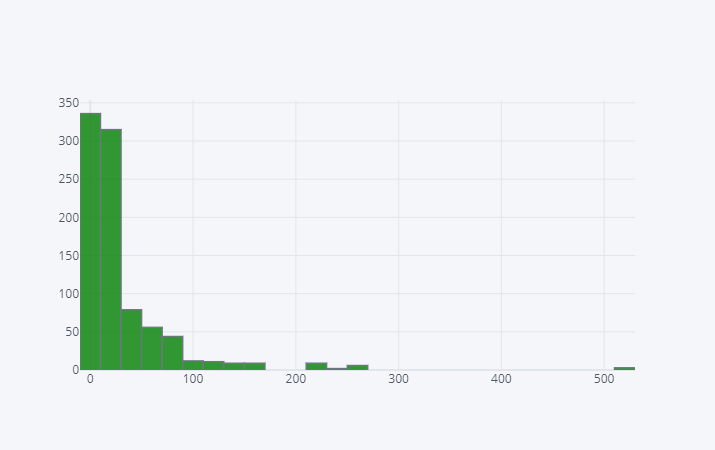

In [20]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning


<Axes: xlabel='Pclass', ylabel='Age'>

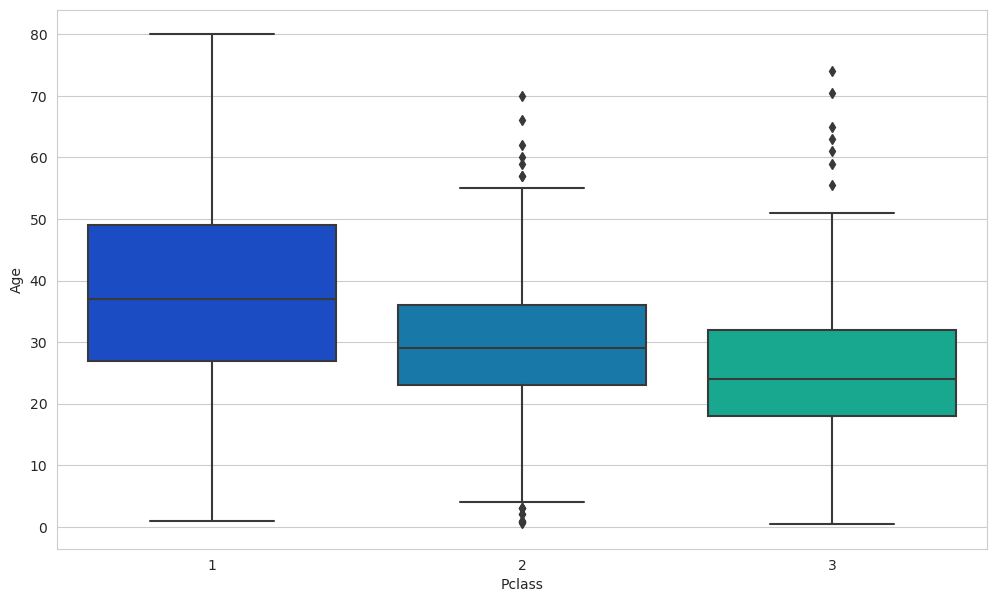

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<Axes: >

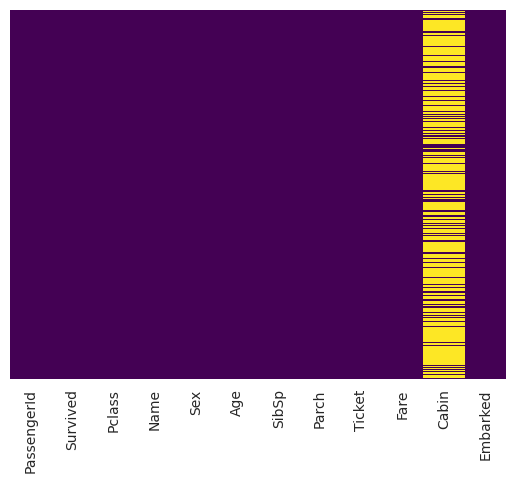

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [27]:
train.dropna(inplace=True)

## Converting Categorical Features 



In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 889 entries, 0 to 890

Data columns (total 11 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  889 non-null    int64  

 1   Survived     889 non-null    int64  

 2   Pclass       889 non-null    int64  

 3   Name         889 non-null    object 

 4   Sex          889 non-null    object 

 5   Age          889 non-null    float64

 6   SibSp        889 non-null    int64  

 7   Parch        889 non-null    int64  

 8   Ticket       889 non-null    object 

 9   Fare         889 non-null    float64

 10  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(4)

memory usage: 83.3+ KB


In [28]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [32]:
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1


# Building a Logistic Regression model


## Train Test Split

In [34]:
train.drop('Survived',axis=1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1       3  22.0      1      0   7.2500     1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1
3            4       1  35.0      1      0  53.1000     0  0  1
4            5       3  35.0      0      0   8.0500     1  0  1

In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)
#log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
#log_model.fit(X_train,y_train)
logmodel=LogisticRegression(max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix


In [43]:
accuracy=confusion_matrix(y_test,predictions)

In [44]:
accuracy

array([[149,  14],
       [ 33,  71]])

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8239700374531835

In [47]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

## Evaluation

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

